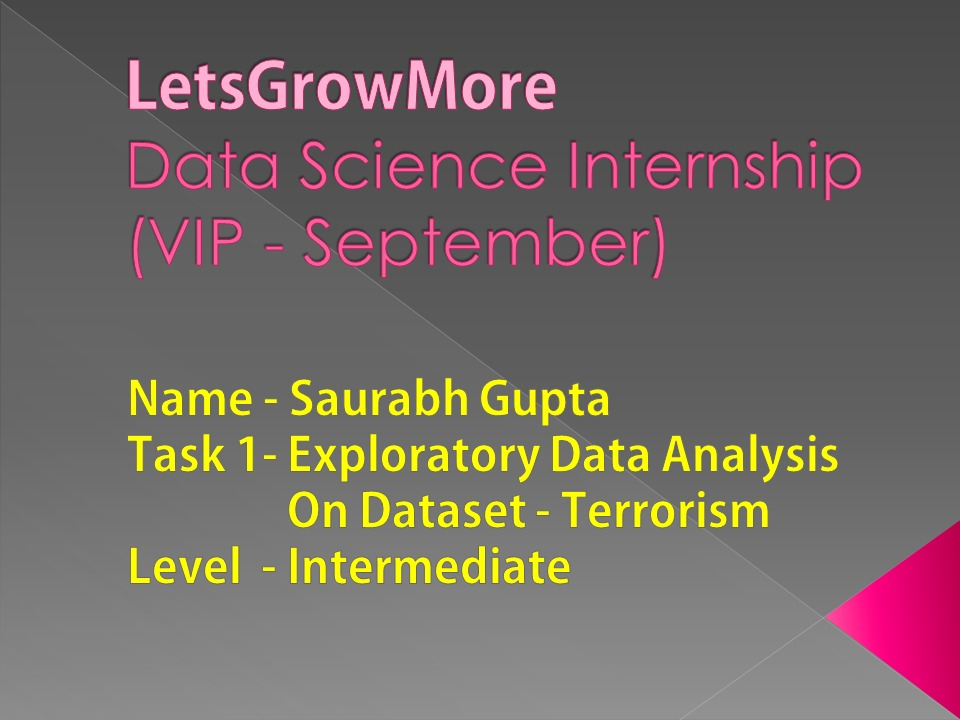

# Exploratory data Analysis on Global Terrorism...

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# (1) Reading the Data

In [3]:
Terror = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')
Terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


### Lets see the column names...

In [4]:
Terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Displaying the info of the terror dataset...

In [5]:
Terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### Checking for the null values...

In [6]:
Terror.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

* Here we can see there are so many null values in the data set but we don't need all the dataset to do eda.
* Total Number of attributes are 135 
* We have to Choose the specific attributes from which we can interpret the Global Terrorism Behavior

# (2) Preparing the Data

### Renaming the important columns...

In [7]:
# Here we rename some important columns for better understanding...

Terror.rename(columns={'provstate':'State','iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region',
                   'attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                   'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

### Adding a new column...

In [9]:
# Here i m making new column Casualities which is summation of two columns Killed and Wounded 

Terror['Casualities'] = Terror.Killed + Terror.Wounded

### Making a new dataset of important columns

In [10]:
Terror_updated = Terror[['Year','Month','Day','Country','State','Region','City','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive',"Casualities"]]

In [11]:
# Lets see the new dataset...

Terror_updated.head()

,Year,Month,Day,Country,State,Region,City,latitude,longitude,Attack_type,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


### Checking null values for the new dataset...

In [12]:
Terror_updated.isna().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
City              434
latitude         4556
longitude        4557
Attack_type         0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

* Here we can see some null values in the updated dataset set so we need to remove them for better insights...

In [13]:
# Shape of the dataset before dropping null values...

Terror_updated.shape

(181691, 19)

### Final Terror Dataset...

In [14]:
# Here i give the new dataset named "Terror_Final" after dropping all the null values

Terror_Final = Terror_updated.dropna(axis=0)

### Shape of the Final terror dataset

In [15]:
Terror_Final.shape

(46556, 19)

* Here we have 46556 rows and 19 columns in the final dataset

### Checking for the duplicated value...

In [16]:
Terror_Final.duplicated()

5         False
8         False
9         False
11        False
14        False
          ...  
181663    False
181665    False
181672    False
181682    False
181683    False
Length: 46556, dtype: bool

* So here we can see , the final terror data set does't have any duplicate values...

### 1. The Most Attacked countries , city , region, year, month, group, types 

In [17]:
print("Country with the most attacks:",Terror_Final['Country'].value_counts().idxmax())
print("City with the most attacks:",Terror_Final['City'].value_counts().index[0]) #as first entry is 'unknown'
print("Region with the most attacks:",Terror_Final['Region'].value_counts().idxmax())
print("Year with the most attacks:",Terror_Final['Year'].value_counts().idxmax())
print("Month with the most attacks:",Terror_Final['Month'].value_counts().idxmax())
print("Group with the most attacks:",Terror_Final['Group'].value_counts().index[1])
print("Most Attack Types:",Terror_Final['Attack_type'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: South Asia
Year with the most attacks: 2011
Month with the most attacks: 7
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


### 2. Country - Top 10 countries affected by terror attack

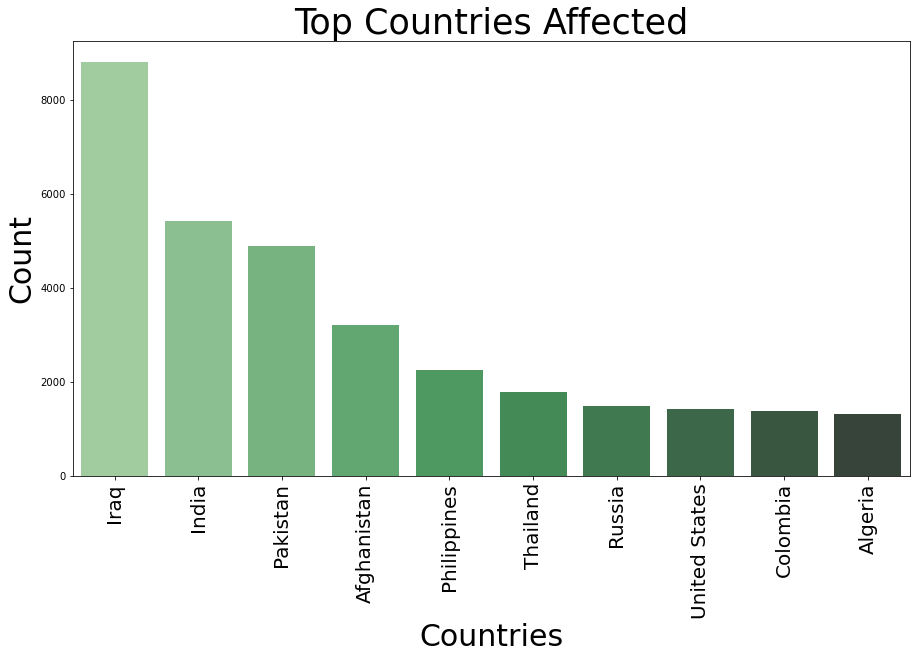

In [18]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Country'].value_counts()[:10].index,Terror_Final['Country'].value_counts()[:10].values,palette='Greens_d')
plt.title('Top Countries Affected' , fontsize = 35)
plt.xlabel('Countries' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()


In [37]:
idx=1
for i in Terror_Final['Country'].value_counts()[0:10].index:
    print(idx,".",i,"------>")
    print("                            ",Terror_Final['Country'].value_counts()[i],"attacks")
    print()
    idx+=1

1 . Iraq ------>
                             8811 attacks

2 . India ------>
                             5427 attacks

3 . Pakistan ------>
                             4900 attacks

4 . Afghanistan ------>
                             3206 attacks

5 . Philippines ------>
                             2253 attacks

6 . Thailand ------>
                             1782 attacks

7 . Russia ------>
                             1488 attacks

8 . United States ------>
                             1426 attacks

9 . Colombia ------>
                             1389 attacks

10 . Algeria ------>
                             1328 attacks



### 3. Year - Number of Terrorist Activities each Year

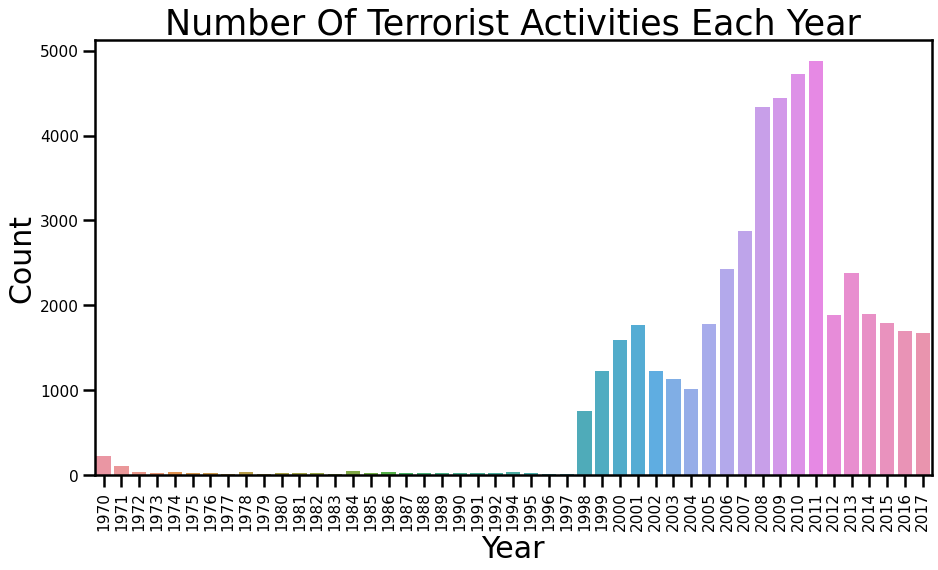

In [19]:

plt.figure(figsize=(15,8))
sns.set_context("poster" , font_scale = 0.7)
sns.countplot(Terror_Final["Year"])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year' ,fontsize = 35 )
plt.xlabel('Year' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.show()

### 4. Year - Top 10 Affected Years

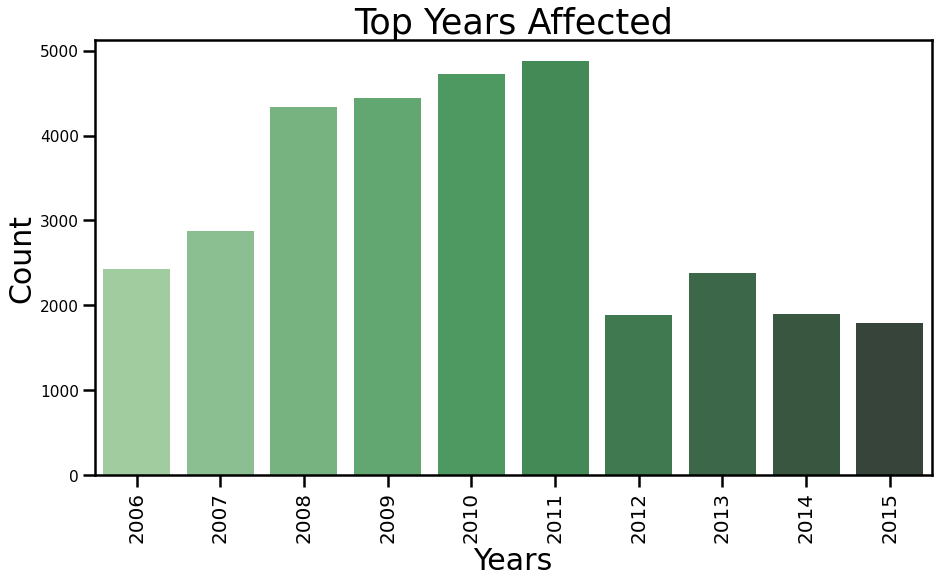

In [20]:
plt.subplots(figsize=(15,8))
sns.barplot(Terror_Final['Year'].value_counts()[:10].index,
            Terror_Final['Year'].value_counts()[:10].values,
            palette='Greens_d')
plt.title('Top Years Affected' , fontsize = 35)
plt.xlabel('Years' , fontsize = 30)
plt.ylabel('Count' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()


### 5. Attack_type - counts of different type of attacks

In [21]:
plt.figure(figsize = (15,8))
sns.countplot(y = Terror_Final['Attack_type']
plt.title('Counts of Attack Type' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Attack Types' , fontsize = 30)
plt.xticks(rotation= 90 , fontsize = 20)
plt.show()

SyntaxError: invalid syntax (<ipython-input-21-2f2a031b4815>, line 3)

### 6. Target_type - Counts of attacks on different types of targets...

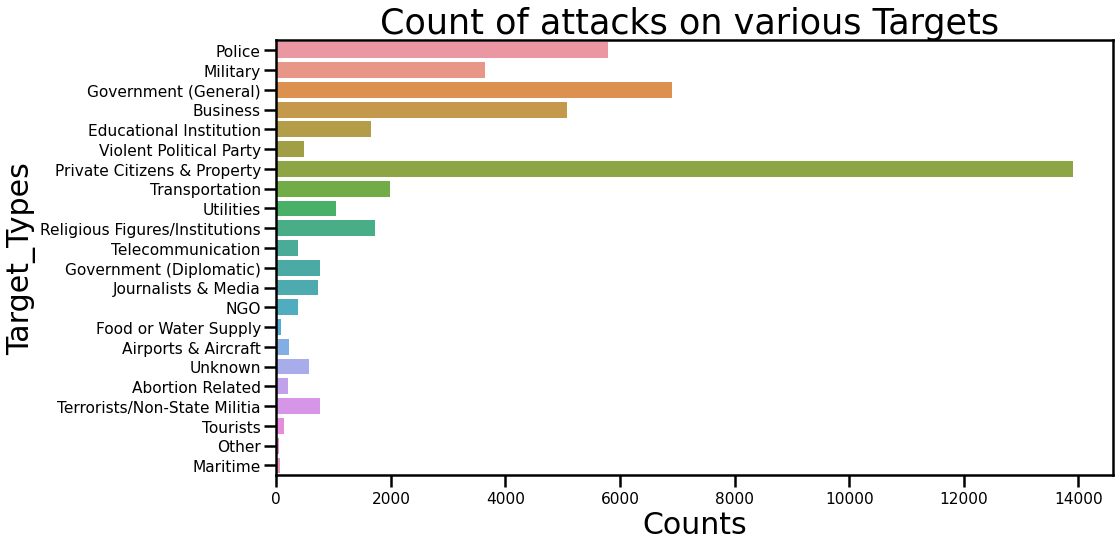

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Target_type'])
plt.title('Count of attacks on various Targets ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Target_Types' , fontsize = 30)
plt.show()


## 7. Weapon Type - counts of weapons used in attacks

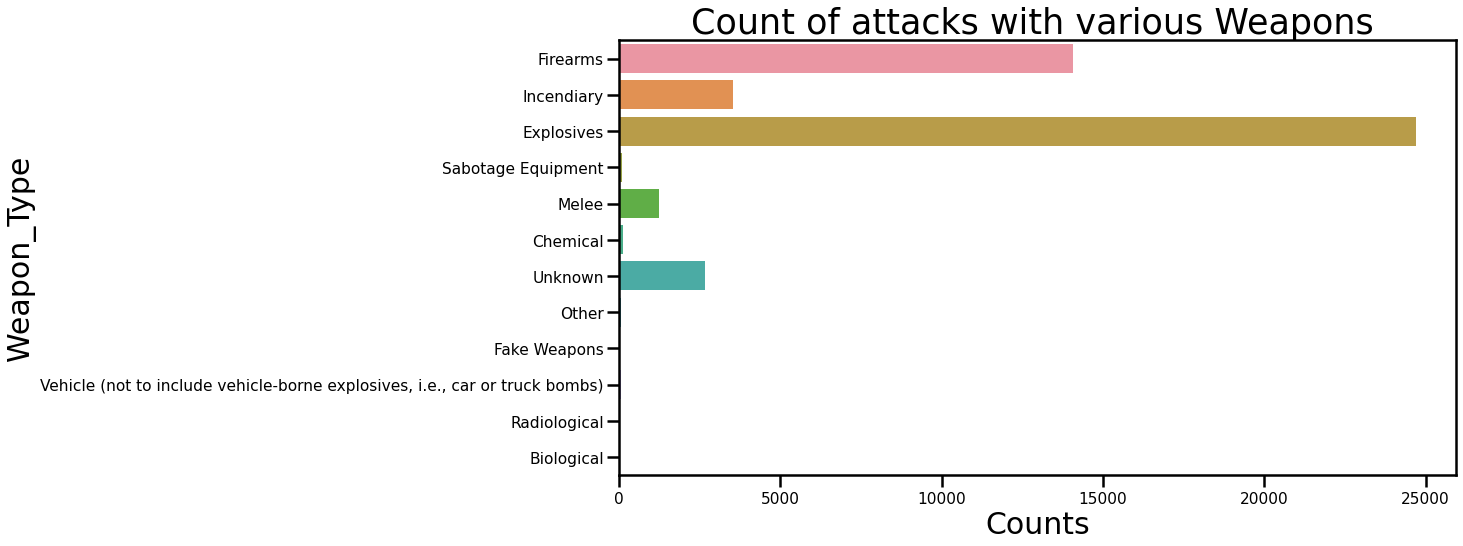

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(y=Terror_Final['Weapon_type'])
plt.title('Count of attacks with various Weapons ' , fontsize = 35)
plt.xlabel('Counts' , fontsize = 30)
plt.ylabel('Weapon_Type', fontsize = 30 )
plt.show()

### 8. Terrorist Organisations - Top 10

In [39]:
Terror_Final['Group'].value_counts()[:10]

Unknown                                           23234
Taliban                                            1884
Communist Party of India - Maoist (CPI-Maoist)     1654
Revolutionary Armed Forces of Colombia (FARC)       845
New People's Army (NPA)                             806
Tehrik-i-Taliban Pakistan (TTP)                     797
Islamic State of Iraq and the Levant (ISIL)         784
Maoists                                             740
Al-Shabaab                                          642
Liberation Tigers of Tamil Eelam (LTTE)             613
Name: Group, dtype: int64

### 9. Most affected Regions Across the Globe...

In [45]:
#counting the Number of Terror Attacks per Regions
Terror_Final["Region"].value_counts()


South Asia                     15885
Middle East & North Africa     14186
Southeast Asia                  4703
Sub-Saharan Africa              3554
Western Europe                  2442
Eastern Europe                  2095
South America                   1650
North America                   1543
Central Asia                     224
East Asia                        152
Central America & Caribbean       72
Australasia & Oceania             50
Name: Region, dtype: int64

### 10.Most Active Terrorist Organization

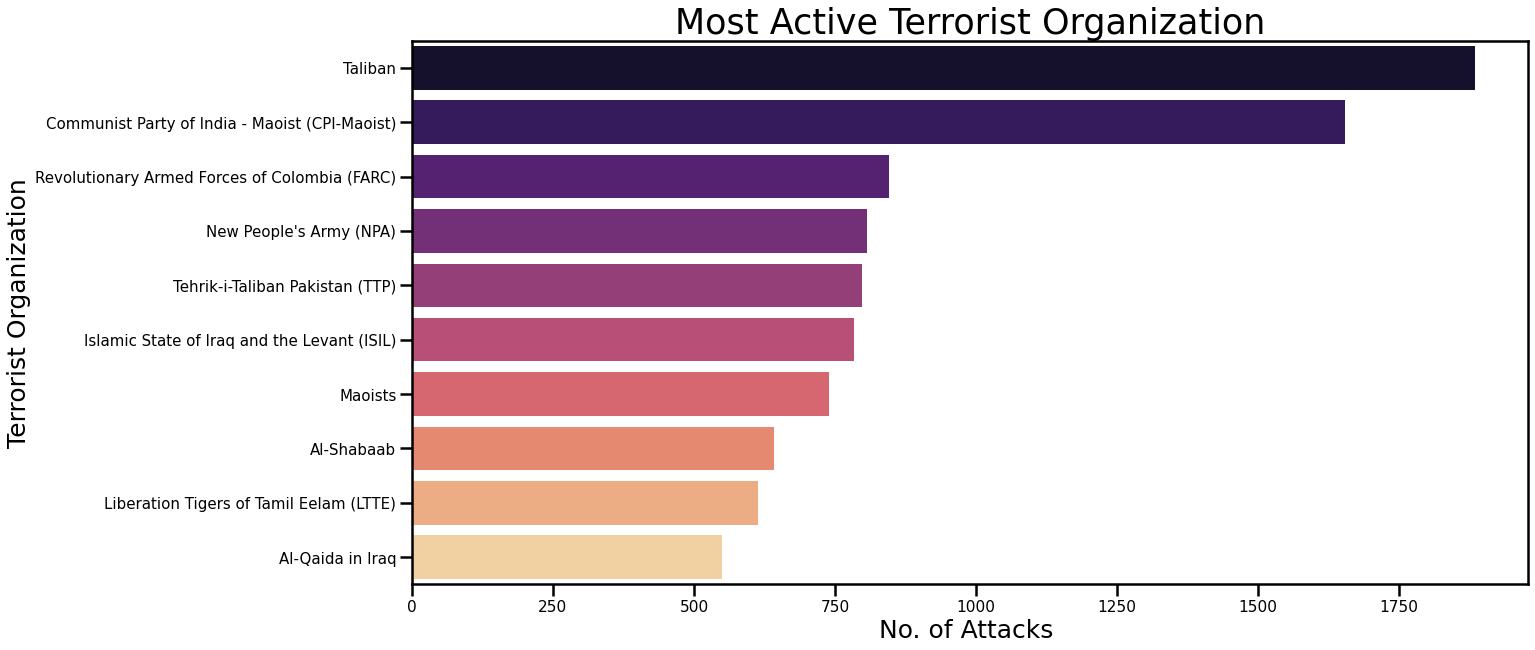

In [48]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x=Terror_Final['Group'].value_counts()[1:11].values,
            y=Terror_Final['Group'].value_counts()[1:11].index,
            palette='magma')
plt.yticks(size=15)
plt.xlabel("No. of Attacks ",fontsize=25)
plt.ylabel("Terrorist Organization",fontsize=25)
plt.title("Most Active Terrorist Organization",fontsize=35)
plt.show()
fig.savefig('Most Active Terrorist Oraganization',bbox_inches='tight')


In [56]:
idx=1
print("                         Most Active Terror Organizations")
for i in Terror_Final['Group'].value_counts()[1:6].index:
    print(idx,".",i,"---->")                                                                  
    print("                                                     ",Terror_Final['Group'].value_counts()[i],"attacks")
    print()
    idx+=1

                         Most Active Terror Organizations
1 . Taliban ---->
                                                      1884 attacks

2 . Communist Party of India - Maoist (CPI-Maoist) ---->
                                                      1654 attacks

3 . Revolutionary Armed Forces of Colombia (FARC) ---->
                                                      845 attacks

4 . New People's Army (NPA) ---->
                                                      806 attacks

5 . Tehrik-i-Taliban Pakistan (TTP) ---->
                                                      797 attacks



### 11. Number of Casuality Due to Terror attacks

In [58]:
lis=[]
total=[]
for i in Terror_Final['Country'].value_counts().index:
    Total = Terror_Final.loc[Terror_Final['Country'] == i, 'Casualities'].sum()
    lis.append([i,Total])

In [59]:
lis=sorted(lis,key=lambda x:x[1],reverse=True)
print(*lis[:20])   #country wise casuality over the years from 1970 to 2017

['Iraq', 109153.0] ['Pakistan', 36224.0] ['India', 24169.0] ['Afghanistan', 22551.0] ['United States', 20834.0] ['Sri Lanka', 9798.0] ['Russia', 9309.0] ['Algeria', 8208.0] ['Philippines', 7626.0] ['Somalia', 7179.0] ['Kenya', 6146.0] ['Colombia', 5923.0] ['Nigeria', 5886.0] ['Thailand', 5653.0] ['Israel', 5287.0] ['Turkey', 4515.0] ['Yemen', 4334.0] ['Syria', 3160.0] ['Nepal', 3159.0] ['Bangladesh', 2784.0]


### 12. Country vs Casuality

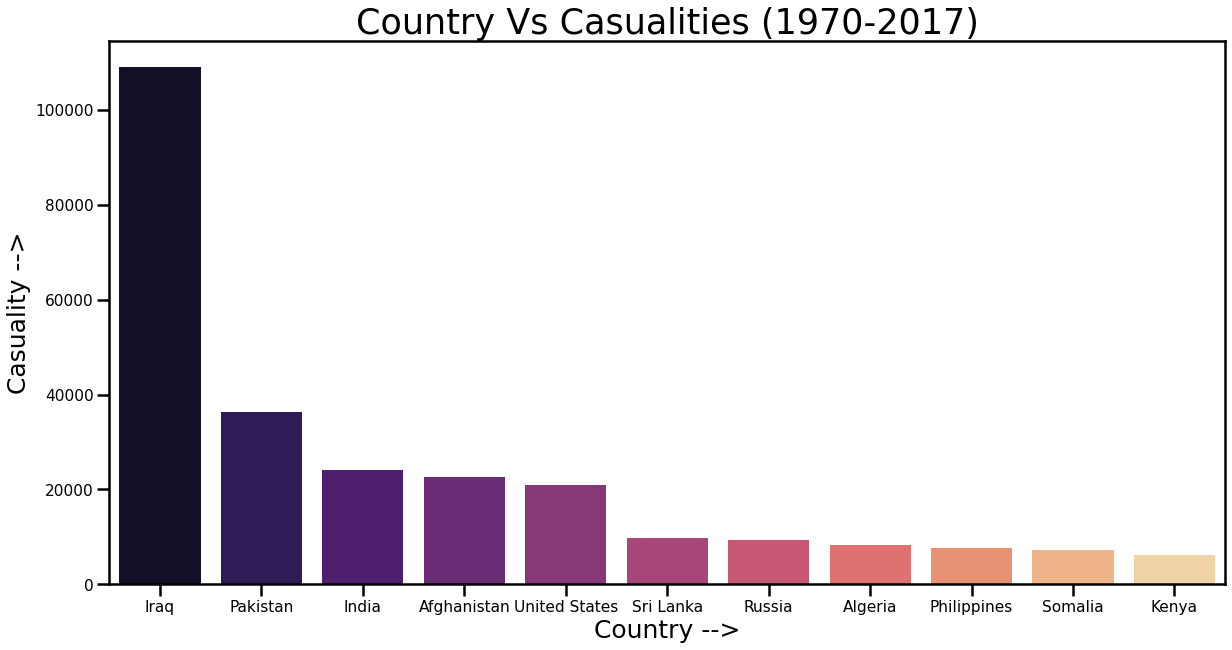

In [61]:
country=[]
casuality=[]
for i in lis[:11]:
    country.append(i[0])
    casuality.append(i[1])
#print(country)
#print(casual)
fig=plt.figure(figsize=(20,10))
plt.title("Country Vs Casualities (1970-2017)",fontsize=35)
plt.xlabel("Country -->",size=25)
plt.ylabel("Casuality -->",size=25)
sns.barplot(x=country,y=casuality,palette='magma')
plt.show()
fig.savefig('Country Vs Casuality From 1970 to 2017',bbox_inches='tight')

### 13. Terrorist Activities by Region in each Year through Area Plot

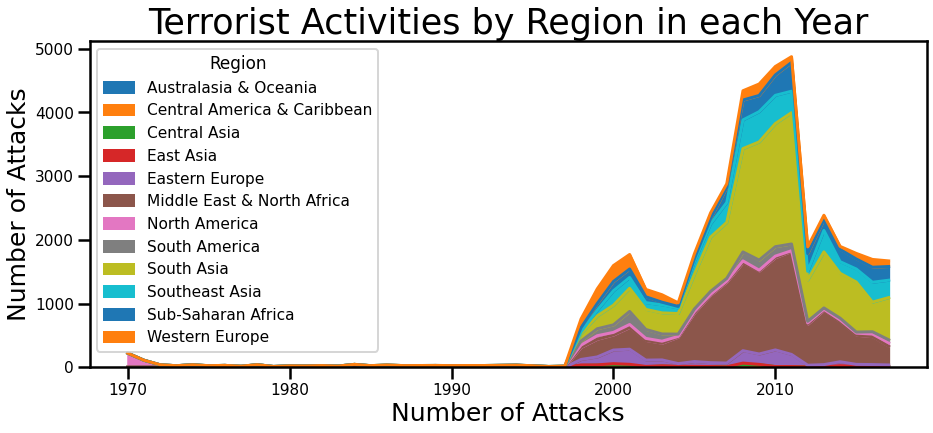

In [62]:
pd.crosstab(Terror_Final.Year, Terror_Final.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year', size = 35)
plt.xlabel('Number of Attacks' , size = 25)
plt.ylabel('Number of Attacks', size = 25)
plt.show()


# Conclusions-------------

## (1) The Most Attacked countries , city , region, year, month, group, types.
## (2) Top 10 countries affected by terror attack
## (3) Number of Terrorist Activities each Year
## (4) Top 10 Affected Years
## (5) Counts of different type of attacks
## (6) Counts of attacks on different types of targets
## (7) Counts of weapons used in attacks
## (8) Top 10 Terrorist Organisations
## (9) Most affected Regions Across the Globe
## (10) Most Active Terrorist Organization
## (11) Number of Casuality Due to Terror attacks
## (12) Country vs Casuality
## (13) Terrorist Activities by Region in each Year through Area Plot
